# Importing Standard Libraries 

In [4]:
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression , Ridge, RidgeCV
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, cross_val_score
from sklearn.ensemble  import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import dill
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=5)
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Loading the data 

In [4]:
Data=pd.read_csv(url, sep="\t")

In [5]:
Data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [6]:
# 125 mg/ deci letter . glucose . serum ( plassma ) : 157

# Explore the data 

## Check the features 

In [7]:
Data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [8]:
Data.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

## check the size of the dataset

In [9]:
Data.shape

(442, 11)

In [10]:
Data.groupby(by='SEX').any().count

<bound method DataFrame.count of       AGE   BMI    BP    S1    S2    S3    S4    S5    S6     Y
SEX                                                            
1    True  True  True  True  True  True  True  True  True  True
2    True  True  True  True  True  True  True  True  True  True>

## Plotting 

In [11]:
"data collected from  {} of diabets patients ".format(Data.shape[0])

'data collected from  442 of diabets patients '

In [7]:
XData=Data.iloc[:,:10]

In [ ]:
plt.figure(figsize=[15,5])

plt.title("Distribution of the data ")
#plt.ylabel("Progression of the Diabets")

for i in range(4):
    plt.subplot(1,4, i+1)
    if i==0:
        plt.ylabel("Progression of the Diabets")
    plt.subplot(1,4,i+1)
    plt.scatter(Data.iloc[:,i],Data.iloc[:, Data.shape[1]-1] ,zorder=2)
    #plt.plot(Data.iloc[:,i],Data.iloc[:, Data.shape[1]-1] )
    plt.xlabel(Data.columns[i])
plt.savefig("Explore_Data.jpg")
plt.show()



plt.figure(figsize=[15,5])
for j in range(4,Data.shape[1]-1):
    
    plt.subplot(1,6,j-3)
    
    if j==4:
        plt.ylabel("Progression of the Diabets")
    
    #plt.plot(XData.iloc[:,i],lr.predict(XData.iloc[:,[i]] ),'r-', linewidth=3 )
    plt.scatter(Data.iloc[:,i],Data.iloc[:, Data.shape[1]-1], )
    #plt.scatter(Data.iloc[:,i],Data.iloc[:, Data.shape[1]-1])
    
    plt.xlabel(Data.columns[j])
    
plt.savefig("Explore_Data1.jpg")    
plt.show()

 ## Descriptive Staststics

* Datas are  not highly scatter ,but needs to check the outliers and skeweness using hist and box plot 

In [14]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


## Data distribution (skweness )


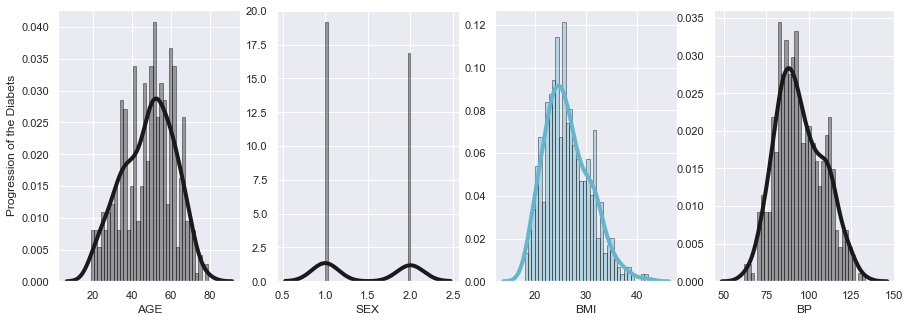

In [15]:
plt.figure(figsize=[15,5])
plt.title("Distribution of the data ")
plt.ylabel("Progression of the Diabets")
for i in range(4):
    
    ax=plt.subplot(1,4,i+1)
    if i ==0:
        plt.ylabel("Progression of the Diabets")
    #plt.text(23, 45, r'$\mu=15, b=3$')
    #plt.hist(Data.iloc[:,i] ,edgecolor = 'black',color=random.choice(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))
    sns.distplot(Data.iloc[:,i], hist=True, kde=True, bins=int(180/5), color = random.choice(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']), hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    
    #plt.axvline(Data.iloc[:,i].mean(), color='r', linestyle='dashed', linewidth=1)
#sns.show()

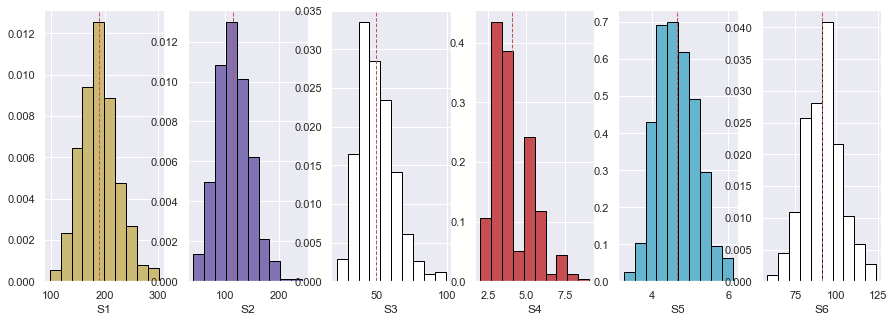

In [16]:
plt.figure(figsize=[15,5])
for i in range(4,Data.shape[1]-1):
    
    plt.subplot(1,6,i-3)
    plt.hist(Data.iloc[:,i], density=True,edgecolor = 'black', color=random.choice(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))
    #plt.text(23, 45, r'$\mu=15, b=3$')
    plt.xlabel(Data.columns[i])
    plt.axvline(Data.iloc[:,i].mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()

## outlier detection (Show outliers)

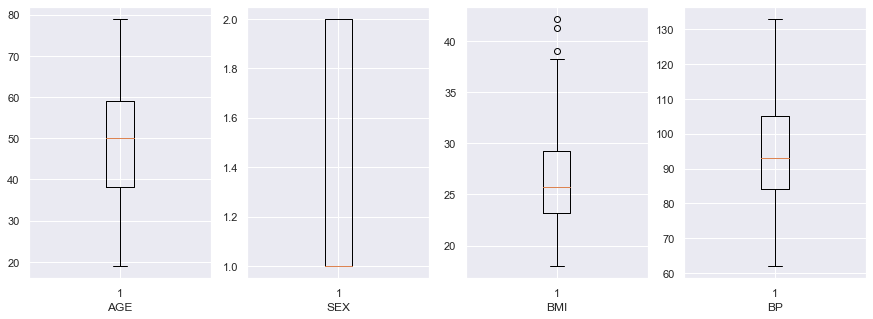

In [17]:

plt.figure(figsize=[15,5])
plt.title("Distribution of the data ")
plt.ylabel("Progression of the Diabets")
for i in range(4):
    if i == 0:
        plt.ylabel("Progression of the disease")
    plt.subplot(1,4,i+1)
    plt.boxplot(Data.iloc[:,i],showfliers=True)
    plt.xlabel(Data.columns[i])
plt.savefig("outlier1.jpg")
plt.show()

### Observation 

* outliers are observed  on the following features 
    * MBI
    * S1
    * S2
    * S3
    * S4
    * S5
    * S6
    
 So those outliers will be treated in the next process 
 https://scikit-learn.org/stable/modules/preprocessing.html

## Relationships Between features 

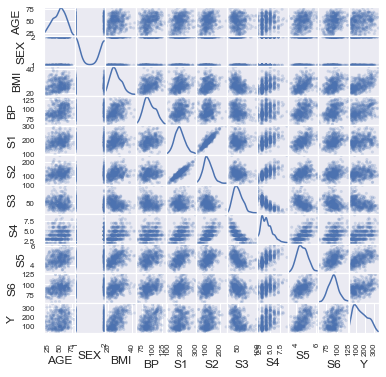

In [18]:
pd.plotting.scatter_matrix(Data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

## Progression of Diabetes bygender

In [25]:
Data.rename(columns={'Y':"Progression of Diabets"}, inplace=True)

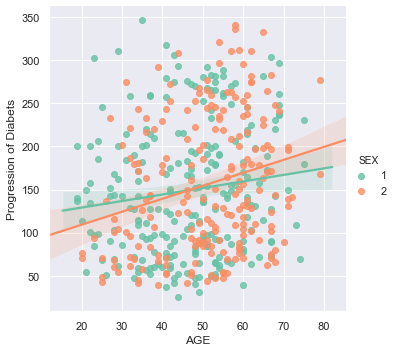

In [26]:
Group=sns.lmplot(x='AGE', y='Progression of Diabets', hue='SEX', data=Data, palette="Set2")
plt.savefig("bygroup.jpg")

## Conclusion 

* Multivariant (int , category , float )
* Datat in all features are not in the same scaled 
* some outliers are identified 

plannned activity (correction and preprocessing )
* Encoding the categorical variables 
* Normalization  : (make date the same  scaled)
* Treatment of outliers 

# Part II

* Encoding the categorical features 
* Feature Scaling : Normalization or Standardazation 
* Outlier Treament 

## Encoding : Gender Feature

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

In [20]:
oh= ColumnTransformer([("One_Hot_Encoder",OneHotEncoder(categories='auto',sparse=False),['SEX'])], remainder='passthrough')

In [21]:
Features=Data.iloc[:,:10]

Target=Data.iloc[:,10]

Encoded_Data=oh.fit_transform(Features)

## Feature Scaling

In [265]:
Scalled_Data=ColumnTransformer([("Scaled",StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10])])

In [28]:
Scalled_Data.fit_transform(Encoded_Data)

array([[-1.06548848,  1.06548848,  0.80050009, ..., -0.05449919,
         0.41853093, -0.37098854],
       [ 0.93853666, -0.93853666, -0.03956713, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [-1.06548848,  1.06548848,  1.79330681, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [-1.06548848,  1.06548848,  0.87686984, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [ 0.93853666, -0.93853666, -0.9560041 , ...,  0.55838411,
         0.93616291, -0.54515416],
       [ 0.93853666, -0.93853666, -0.9560041 , ..., -0.83030083,
        -0.08875225,  0.06442552]])

# Pipline  and estimators

In [ ]:
#pipline
pip=Pipeline([('oh',oh),('Scaler',Scalled_Data)])

## RandomForest Reressor 

### estimator 

In [417]:
Data_Train,Data_test, Target_train,Target_test=train_test_split(Features,Target, test_size=0.1, random_state=42)

In [432]:
RF_est=Pipeline([('pip_OnHot_Scaled',pip), ("RF",RandomForestRegressor(n_estimators=15,max_depth=112.88378916846884))])
RF_est.fit(Data_Train,Target_train)
RF_est.score(Data_test,Target_test)

0.5731476124775869

In [431]:
r2_score(Target_test,RF_est.predict(Data_test))

0.537820450822617

In [476]:
RF_est=Pipeline([('pip_OnHot_Scaled',pip), ("RF",RandomForestRegressor(n_estimators=15,max_depth=16))])
RF_est.fit(Data_Train,Target_train)
RF_est.score(Data_test,Target_test)

0.46311522204081

In [31]:
RF_est.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('pip_OnHot_Scaled',
                 Pipeline(memory=None,
                          steps=[('oh',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='passthrough',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('One_Hot_Encoder',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                 

### Hyperparameter Tunning and test generalization using cross validation

In [390]:
#Data_Train,Data_test, Target_train,Target_test=train_test_split(Normalized,Scaled_Target.ravel(), test_size=0.2, random_state=0)
C_score=list()
N=list(range(1,200))

test_error=list()
In_sample_Error=list()
Total_Error=list()
for m in N:
    pipe_CV = Pipeline([('pip_OnHot_Scaled',pip), ("RF",RandomForestRegressor(n_estimators=m,max_depth=112.8837891684688))])
    C_score.append(-cross_val_score(pipe_CV,Data_Train,Target_train,cv=5,scoring='neg_mean_squared_error').mean())
    pipe_CV.fit(Data_Train,Target_train)
    Y_Pre_Test=pipe_CV.predict(Data_test)
    Y_Pre_Train=pipe_CV.predict(Data_Train)
    MSE_Test=mean_squared_error(Target_test,Y_Pre_Test)
    MSE_Train= mean_squared_error(Target_train,Y_Pre_Train)
    test_error.append(MSE_Test)
    In_sample_Error.append(MSE_Train)
    #Total_Error.append(In_sample_Error**2+test+)

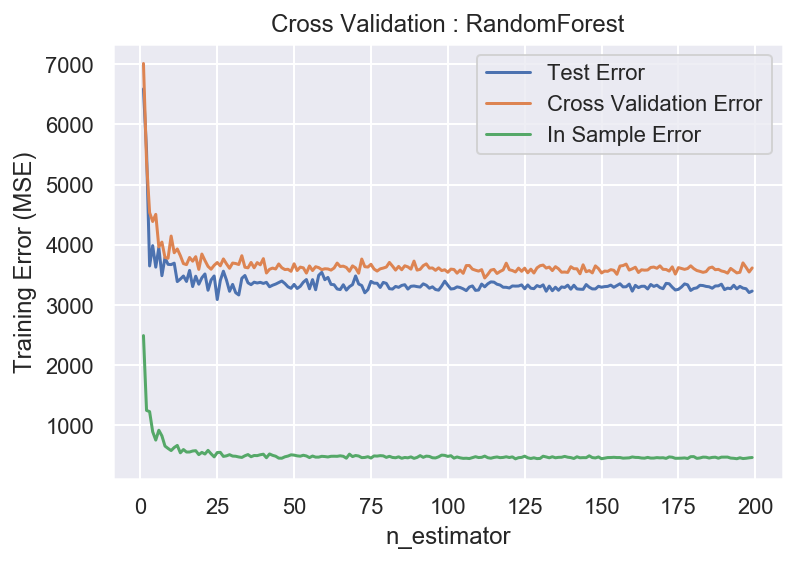

In [391]:
plt.plot(N,test_error,label='Test Error')
plt.plot(N,C_score, label='Cross Validation Error')
plt.plot(N,In_sample_Error, label='In Sample Error')
plt.xlabel('n_estimator')
plt.ylabel('Training Error (MSE)')
plt.grid(True)
plt.title("Cross Validation : RandomForest")
#plt.xlim([5,87])
#plt.ylim([0,1])
plt.legend(loc='upper right')
#plt.savefig("Cross_Valid_RandomForest_n_estimator.jpg")
plt.show()

In [467]:
param_grid = { 
        'RF__max_depth' : np.logspace(1,3,20)
        
        #'Ridge__max_iter' : np.arange(100,200)
    
}
poly_GS=GridSearchCV(RF_est,param_grid, cv=5, iid=False )
poly_GS.fit(Data_Train,Target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pip_OnHot_Scaled',
                                        Pipeline(memory=None,
                                                 steps=[('oh',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='passthrough',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('One_Hot_Encoder',
                                                                                          OneHotEncoder(categorical_features=None,
                                                                                            

In [468]:
poly_GS.best_params_

{'RF__max_depth': 16.237767391887218}

In [469]:
poly_GS.best_score_

0.3824170754501976

## Using Ridge Regression

In [60]:
pip=Pipeline([('oh',oh),('Scaler',Scalled_Data)])
Ridge_est=Pipeline([('pip_OnHot_Scaled',pip), ("Ridge",Ridge(alpha=46.41588833612773))])
Data_Train,Data_test, Target_train,Target_test=train_test_split(Features,Target, test_size=0.2, random_state=42)
Ridge_est.fit(Data_Train,Target_train)
Ridge_est.score(Data_test,Target_test)

0.46083467347473217

In [86]:
Ridge_est.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pip_OnHot_Scaled', 'Ridge', 'pip_OnHot_Scaled__memory', 'pip_OnHot_Scaled__steps', 'pip_OnHot_Scaled__verbose', 'pip_OnHot_Scaled__oh', 'pip_OnHot_Scaled__Scaler', 'pip_OnHot_Scaled__oh__n_jobs', 'pip_OnHot_Scaled__oh__remainder', 'pip_OnHot_Scaled__oh__sparse_threshold', 'pip_OnHot_Scaled__oh__transformer_weights', 'pip_OnHot_Scaled__oh__transformers', 'pip_OnHot_Scaled__oh__verbose', 'pip_OnHot_Scaled__oh__One_Hot_Encoder', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__categorical_features', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__categories', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__drop', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__dtype', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__handle_unknown', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__n_values', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__sparse', 'pip_OnHot_Scaled__Scaler__n_jobs', 'pip_OnHot_Scaled__Scaler__remainder', 'pip_OnHot_Scaled__Scaler__sparse_threshold', 'pip_OnHot_Scaled__Scaler__transformer_

In [55]:
param_grid = { 
        'Ridge__alpha' : np.logspace(-3,3,10)
        
        #'Ridge__max_iter' : np.arange(100,200)
    
}
Ridge_est_GS=GridSearchCV(Ridge_est,param_grid, cv=5, iid=True)
Ridge_est_GS.fit(Data_Train,Target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pip_OnHot_Scaled',
                                        Pipeline(memory=None,
                                                 steps=[('oh',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='passthrough',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('One_Hot_Encoder',
                                                                                          OneHotEncoder(categorical_features=None,
                                                                                            

In [56]:
Ridge_est_GS.best_params_

{'Ridge__alpha': 46.41588833612773}

In [57]:
Ridge_est_GS.best_score_

0.4568997587055508

### Hyperparameter Tunning and test generalization using cross validation

In [110]:
#Data_Train,Data_test, Target_train,Target_test=train_test_split(Normalized,Scaled_Target.ravel(), test_size=0.2, random_state=0)
C_score=list()
N=np.logspace(0,3,10)

test_error=list()
In_sample_Error=list()
Total_Error=list()
for alpha in N:
    pipe_CV = Pipeline([('pip_OnHot_Scaled',pip), ("Ridge",Ridge(alpha=alpha))])
    C_score.append(-cross_val_score(pipe_CV,Data_Train,Target_train,cv=5,scoring='neg_mean_squared_error').mean())
    pipe_CV.fit(Data_Train,Target_train)
    Y_Pre_Test=pipe_CV.predict(Data_test)
    Y_Pre_Train=pipe_CV.predict(Data_Train)
    MSE_Test=mean_squared_error(Target_test,Y_Pre_Test)
    MSE_Train= mean_squared_error(Target_train,Y_Pre_Train)
    test_error.append(MSE_Test)
    In_sample_Error.append(MSE_Train)
    #Total_Error.append(In_sample_Error**2+test+)

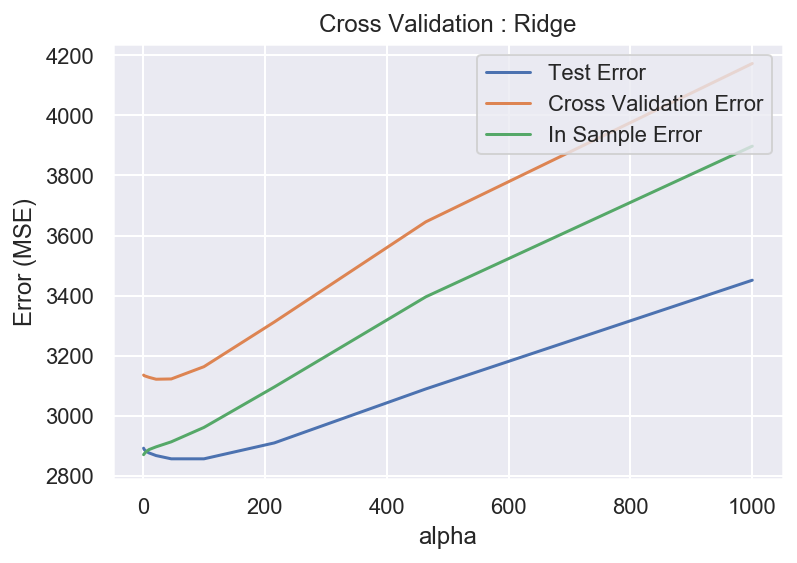

In [111]:
plt.plot(N,test_error,label='Test Error')
plt.plot(N,C_score, label='Cross Validation Error')
plt.plot(N,In_sample_Error, label='In Sample Error')
plt.xlabel('alpha')
plt.ylabel('Error (MSE)')
plt.grid(True)
plt.title("Cross Validation : Ridge")
#plt.xlim([5,87])
#plt.ylim([0,1])
plt.legend(loc='upper right')
plt.savefig("Cross_Valid_Ridge.jpg")
plt.show()

In [41]:
pip=Pipeline([('oh',oh),('Scaler',Scalled_Data)])
Ridgecv_est=Pipeline([('pip_OnHot_Scaled',pip), ("RidgeCv",RidgeCV())])
Data_Train,Data_test, Target_train,Target_test=train_test_split(Features,Target, test_size=0.2, random_state=42)
Ridgecv_est.fit(Data_Train,Target_train)
Ridgecv_est.score(Data_test,Target_test)

0.45413927986876435

In [99]:
Ridgecv_est

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('pip_OnHot_Scaled',
                 Pipeline(memory=None,
                          steps=[('oh',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='passthrough',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('One_Hot_Encoder',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                 

## KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [154]:
pip=Pipeline([('oh',oh),('Scaler',Scalled_Data)])
Data_Train,Data_test, Target_train,Target_test=train_test_split(Features,Target, test_size=0.2, random_state=42)

In [44]:
KNN_est=Pipeline([('pip_OnHot_Scaled',pip), ("KNN",KNeighborsRegressor(n_neighbors=9))])
KNN_est.fit(Data_Train, Target_train)
KNN_est.score(Data_test,Target_test)

0.430651229238862

In [48]:
Y_predict=KNN_est.predict(Data_test)

In [50]:
ERROR=abs (Y_predict- Target_test)

In [51]:
ERROR.mean()

43.69912609238454

In [165]:
KNN_est.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pip_OnHot_Scaled', 'KNN', 'pip_OnHot_Scaled__memory', 'pip_OnHot_Scaled__steps', 'pip_OnHot_Scaled__verbose', 'pip_OnHot_Scaled__oh', 'pip_OnHot_Scaled__Scaler', 'pip_OnHot_Scaled__oh__n_jobs', 'pip_OnHot_Scaled__oh__remainder', 'pip_OnHot_Scaled__oh__sparse_threshold', 'pip_OnHot_Scaled__oh__transformer_weights', 'pip_OnHot_Scaled__oh__transformers', 'pip_OnHot_Scaled__oh__verbose', 'pip_OnHot_Scaled__oh__One_Hot_Encoder', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__categorical_features', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__categories', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__drop', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__dtype', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__handle_unknown', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__n_values', 'pip_OnHot_Scaled__oh__One_Hot_Encoder__sparse', 'pip_OnHot_Scaled__Scaler__n_jobs', 'pip_OnHot_Scaled__Scaler__remainder', 'pip_OnHot_Scaled__Scaler__sparse_threshold', 'pip_OnHot_Scaled__Scaler__transformer_we

In [143]:
param_grid = { 
        'KNN__n_neighbors' : list(range(1,10))
        
        #'Ridge__max_iter' : np.arange(100,200)
    
}
KNN_est_GS=GridSearchCV(KNN_est,param_grid, cv=5, iid=True)
KNN_est_GS.fit(Data_Train,Target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pip_OnHot_Scaled',
                                        Pipeline(memory=None,
                                                 steps=[('oh',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='passthrough',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('One_Hot_Encoder',
                                                                                          OneHotEncoder(categorical_features=None,
                                                                                            

In [147]:
KNN_est_GS.best_score_

0.37602437292457924

### Hyperparameter Tunning and test generalization using cross validation

In [141]:
Data_Train,Data_test, Target_train,Target_test=train_test_split(Data,Target, test_size=0.2, random_state=42)
C_score=list()
N=list(range(1,50))

test_error=list()
In_sample_Error=list()
Total_Error=list()
for n_egn in N:
    pipe_CV = Pipeline([ ("Knn",KNeighborsRegressor(n_neighbors=n_egn))])
    C_score.append(-cross_val_score(pipe_CV,Data_Train,Target_train,cv=5,scoring='neg_mean_squared_error').mean())
    pipe_CV.fit(Data_Train,Target_train)
    Y_Pre_Test=pipe_CV.predict(Data_test)
    Y_Pre_Train=pipe_CV.predict(Data_Train)
    MSE_Test=mean_squared_error(Target_test,Y_Pre_Test)
    MSE_Train= mean_squared_error(Target_train,Y_Pre_Train)
    test_error.append(MSE_Test)
    In_sample_Error.append(MSE_Train)
    #Total_Error.append(In_sample_Error**2+test+)
    

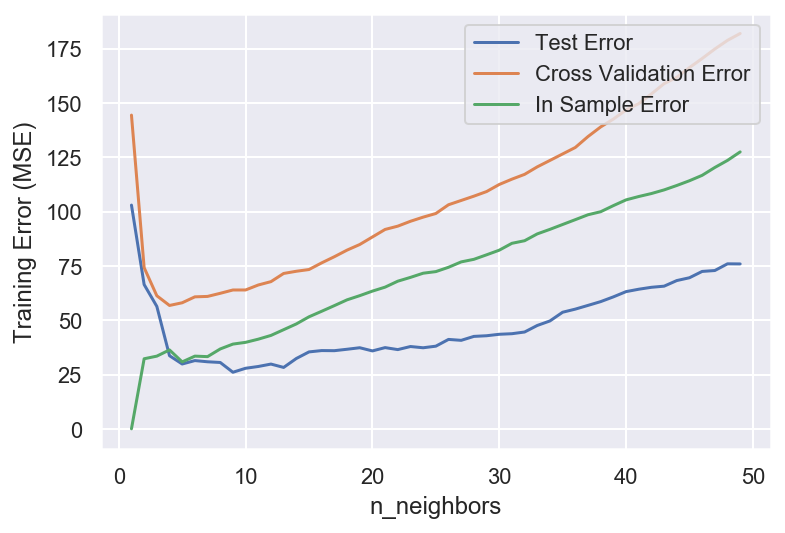

In [142]:
plt.plot(N,test_error,label='Test Error')
plt.plot(N,C_score, label='Cross Validation Error')
plt.plot(N,In_sample_Error, label='In Sample Error')
plt.xlabel('n_neighbors')
plt.ylabel('Training Error (MSE)')
plt.grid(True)
#plt.xlim([5,87])
#plt.ylim([0,1])
plt.legend(loc='upper right')
plt.savefig("Cross_Valid_Knn.jpg")
plt.show()

In [ ]:
dill.dump(KNN_est,open("KNN_est.dill","wb"))

KNN_est=dill.load(open("Ridg_estimator.dill","rb"))

In [40]:
pwd

'C:\\Users\\asfetu\\OneDrive\\DatascienceUCSD\\Resume\\TDI\\CapstoneProject'

In [52]:
# Comparison between algorithms

In [96]:
from sklearn.linear_model import LinearRegression

In [329]:
#Data_Train,Data_test, Target_train,Target_test=train_test_split(Data,Target, test_size=0.2, random_state=42)
KNN_score=[]
RF_score=[]
Ridge_score=[]
RidgeCV_score=[]
LNR_score=[]
test_size=[0.1,0.2,0.3,0.5]
for testsize in test_size:
    Data_Train,Data_test, Target_train,Target_test=train_test_split(Features,Target, test_size=testsize, random_state=42)
    Linear_est=Pipeline([('pip_OnHot_Scaled',pip), ("Linear",LinearRegression())])
    Linear_est.fit(Data_Train, Target_train)
    LNR_score.append(Linear_est.score(Data_test,Target_test))
    KNN_est=Pipeline([('pip_OnHot_Scaled',pip), ("KNN",KNeighborsRegressor(n_neighbors=9))])
    KNN_est.fit(Data_Train, Target_train)
    KNN_score.append(KNN_est.score(Data_test,Target_test))
    Ridge_est=Pipeline([('pip_OnHot_Scaled',pip), ("Ridge",Ridge(alpha=46.41588833612773))])
    Ridge_est.fit(Data_Train, Target_train)
    Ridge_score.append(Ridge_est.score(Data_test,Target_test))
    RidgeCV_est=Pipeline([('pip_OnHot_Scaled',pip), ("Ridge",RidgeCV())])
    RidgeCV_est.fit(Data_Train, Target_train)
    RidgeCV_score.append(RidgeCV_est.score(Data_test,Target_test))
    RF_est=Pipeline([('pip_OnHot_Scaled',pip), ("RF",RandomForestRegressor(n_estimators=52,max_depth=112.88378916846884))])
    RF_est.fit(Data_Train, Target_train)
    RF_score.append(RF_est.score(Data_test,Target_test))

In [330]:
RF_score

[0.5020404508647982,
 0.4269899274061528,
 0.4723311755389591,
 0.40214833037280806]

# Model Selection

## Test Performance 

In [378]:
Index=["RF_score", "Ridge_score","RidgeCV_score","KNN_score","LNR_score"]
Test_performance=pd.DataFrame(columns=["Test_size( "+ str(size)+" )" for size in test_size], index=Index)

In [371]:
Model=[RF_score, Ridge_score,RidgeCV_score,KNN_score,LNR_score]
Index=["RF_score", "Ridge_score","RidgeCV_score","KNN_score","LNR_score"]
for idx,score in enumerate(Model):
    Test_performance.loc[Index[idx],:]=score

In [380]:
Test_performance

,Test_size( 0.1 ),Test_size( 0.2 ),Test_size( 0.3 ),Test_size( 0.5 )
RF_score,0.50204,0.42699,0.472331,0.402148
Ridge_score,0.547403,0.460835,0.480069,0.482
RidgeCV_score,0.552091,0.454139,0.477593,0.47782
KNN_score,0.567214,0.430651,0.390131,0.396529
LNR_score,0.55142,0.443254,0.47729,0.476706


In [382]:
Test_performance.to_json("TestPerformance.json")
Test_performance.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Test_size( 0.1 )</th>\n      <th>Test_size( 0.2 )</th>\n      <th>Test_size( 0.3 )</th>\n      <th>Test_size( 0.5 )</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>RF_score</th>\n      <td>0.50204</td>\n      <td>0.42699</td>\n      <td>0.472331</td>\n      <td>0.402148</td>\n    </tr>\n    <tr>\n      <th>Ridge_score</th>\n      <td>0.547403</td>\n      <td>0.460835</td>\n      <td>0.480069</td>\n      <td>0.482</td>\n    </tr>\n    <tr>\n      <th>RidgeCV_score</th>\n      <td>0.552091</td>\n      <td>0.454139</td>\n      <td>0.477593</td>\n      <td>0.47782</td>\n    </tr>\n    <tr>\n      <th>KNN_score</th>\n      <td>0.567214</td>\n      <td>0.430651</td>\n      <td>0.390131</td>\n      <td>0.396529</td>\n    </tr>\n    <tr>\n      <th>LNR_score</th>\n      <td>0.55142</td>\n      <td>0.443254</td>\n      <td>0.47729</td>\n      <td>0.476706</td>\n    </tr>

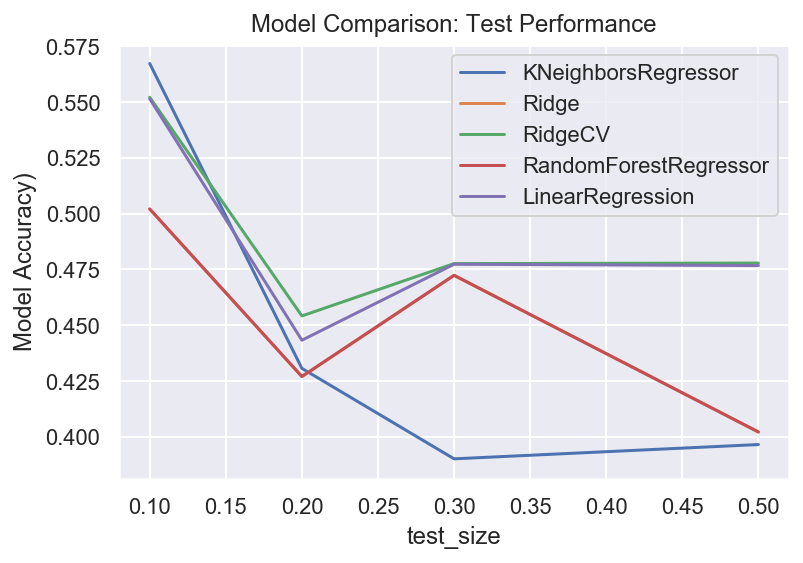

In [383]:
plt.plot(test_size,KNN_score,label='KNeighborsRegressor')
plt.plot(test_size,RF_score, label='Ridge')
plt.plot(test_size,RidgeCV_score, label='RidgeCV')
plt.plot(test_size,RF_score, label='RandomForestRegressor')
plt.plot(test_size,LNR_score, label='LinearRegression')
plt.xlabel('test_size')
plt.ylabel('Model Accuracy)')
plt.title("Model Comparison: Test Performance")
plt.grid(True)
#plt.xlim([5,87])
#plt.ylim([0,1])
plt.legend(loc='upper right')
plt.savefig("ModelComparison.jpg")
plt.show()

## Training Performance 

In [384]:
#Data_Train,Data_test, Target_train,Target_test=train_test_split(Data,Target, test_size=0.2, random_state=42)
KNN_score=[]
RF_score=[]
Ridge_score=[]
RidgeCV_score=[]
LNR_score=[]
Training_size=[0.9,0.8,0.7,0.5]
test_size=[0.1,0.2,0.3,0.5]
for testsize in test_size:
    Data_Train,Data_test, Target_train,Target_test=train_test_split(Features,Target, test_size=testsize, random_state=42)
    Linear_est=Pipeline([('pip_OnHot_Scaled',pip), ("Linear",LinearRegression())])
    Linear_est.fit(Data_Train, Target_train)
    LNR_score.append(Linear_est.score(Data_Train,Target_train))
    KNN_est=Pipeline([('pip_OnHot_Scaled',pip), ("KNN",KNeighborsRegressor(n_neighbors=9))])
    KNN_est.fit(Data_Train, Target_train)
    KNN_score.append(KNN_est.score(Data_Train,Target_train))
    
    Ridge_est=Pipeline([('pip_OnHot_Scaled',pip), ("Ridge",Ridge(alpha=46.41588833612773))])
    Ridge_est.fit(Data_Train, Target_train)
    Ridge_score.append(Ridge_est.score(Data_Train,Target_train))
    
    RidgeCV_est=Pipeline([('pip_OnHot_Scaled',pip), ("Ridge",RidgeCV())])
    RidgeCV_est.fit(Data_Train, Target_train)
    RidgeCV_score.append(RidgeCV_est.score(Data_Train,Target_train))
    RF_est=Pipeline([('pip_OnHot_Scaled',pip), ("RF",RandomForestRegressor(n_estimators=52,max_depth=112.88378916846884))])
    RF_est.fit(Data_Train, Target_train)
    RF_score.append(RF_est.score(Data_Train,Target_train))

In [386]:
Index=["RF_score", "Ridge_score","RidgeCV_score","KNN_score","LNR_score"]
Training_performance=pd.DataFrame(columns=["Test_size( "+ str(size)+" )" for size in test_size], index=Index)

Model=[RF_score, Ridge_score,RidgeCV_score,KNN_score,LNR_score]
Index=["RF_score", "Ridge_score","RidgeCV_score","KNN_score","LNR_score"]
for idx,score in enumerate(Model):
    Training_performance.loc[Index[idx],:]=score

In [388]:
Training_performance.to_json("TrainingPerformance.json")
Training_performance.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Test_size( 0.1 )</th>\n      <th>Test_size( 0.2 )</th>\n      <th>Test_size( 0.3 )</th>\n      <th>Test_size( 0.5 )</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>RF_score</th>\n      <td>0.917282</td>\n      <td>0.926727</td>\n      <td>0.915993</td>\n      <td>0.917365</td>\n    </tr>\n    <tr>\n      <th>Ridge_score</th>\n      <td>0.506554</td>\n      <td>0.520577</td>\n      <td>0.516593</td>\n      <td>0.522427</td>\n    </tr>\n    <tr>\n      <th>RidgeCV_score</th>\n      <td>0.512309</td>\n      <td>0.527632</td>\n      <td>0.524098</td>\n      <td>0.530456</td>\n    </tr>\n    <tr>\n      <th>KNN_score</th>\n      <td>0.520011</td>\n      <td>0.526628</td>\n      <td>0.520759</td>\n      <td>0.521865</td>\n    </tr>\n    <tr>\n      <th>LNR_score</th>\n      <td>0.512515</td>\n      <td>0.525637</td>\n      <td>0.524412</td>\n      <td>0.534075</td>\n 

In [389]:
Training_performance

,Test_size( 0.1 ),Test_size( 0.2 ),Test_size( 0.3 ),Test_size( 0.5 )
RF_score,0.917282,0.926727,0.915993,0.917365
Ridge_score,0.506554,0.520577,0.516593,0.522427
RidgeCV_score,0.512309,0.527632,0.524098,0.530456
KNN_score,0.520011,0.526628,0.520759,0.521865
LNR_score,0.512515,0.525637,0.524412,0.534075


In [ ]:
#fig = plt.figure(figsize=(12,9))

ax=plt.subplot(2,1,1, sharex=ax2)
plt.title("Model Comparison:Training Performance")
plt.plot(Training_size,RF_score, label='RandomForestRegressor')
plt.ylim([0.9,0.95])
plt.delaxes(ax=ax)
ax.legend(loc='upper right')
ax2=plt.subplot(2,1,2)
plt.plot(Training_size,KNN_score,label='KNeighborsRegressor')
plt.plot(Training_size,Ridge_score, label='Ridge')
plt.plot(Training_size,RidgeCV_score, label='RidgeCV')
#plt.plot(Training_size,RF_score, label='RandomForestRegressor')
plt.plot(Training_size,LNR_score, label='LinearRegression')

plt.xlabel('Training_data_size')
plt.ylabel('Model Accuracy (Training))')
plt.grid(True)
#plt.xlim([5,87])
plt.legend(loc='upper right')
plt.savefig("ModelComparison_training.jpg")
plt.show()

# Finalize the selected model with serialization:

In [ ]:
#step 4   serialize the model 
dill.dump(KNN_est,open("KNN_est.dill","wb"))